In [37]:
                                            # Configurações Iniciais
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import os # Importar o módulo 'os' para manipulação de caminhos de diretórios
# Configuração para mostrar todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

In [52]:
                                                        # Carregando o dataset
# Nota: O arquivo está no formato CSV com separador ';'
df = pd.read_csv('Customer-Churn.csv', sep=';')

# Visualizando as primeiras linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


In [39]:
                                            # Informações sobre o arquivo
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas\n")
print("Informações sobre cada coluna:")
df.info()

O dataset possui 7043 linhas e 21 colunas

Informações sobre cada coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null 

In [40]:
                                            # Verificando valores nulos
print("\nValores nulos por coluna:")
df.isnull().sum()


Valores nulos por coluna:


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [41]:
                                            # Mostrando os'TotalCharges' nulos
null_totalcharges = df[df['TotalCharges'].isna()]

# Exibe o DataFrame resultante
print("Linhas com valores nulos em 'TotalCharges':")
print(null_totalcharges)

Linhas com valores nulos em 'TotalCharges':
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2531  5709-LVOEQ  Female              0     Yes        Yes       0   
3343  4075-WKNIU  Female              0     Yes        Yes       0   
4023  2775-SEFEE    Male              0      No        Yes       0   
4315  1371-DWPAZ  Female              0     Yes        Yes       0   
4583  4472-LVYGI  Female              0     Yes        Yes       0   
5484  4367-NUYAO    Male              0     Yes        Yes       0   
5549  3213-VVOLG    Male              0     Yes        Yes       0   
6213  3115-CZMZD    Male              0      No        Yes       0   
6429  2520-SGTTA  Female              0     Yes        Yes       0   
6562  7644-OMVMY    Male              0     Yes        Yes       0   
6682  2923-ARZLG    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
2531          Yes                No    

In [47]:
                                            # Preenchendo 'TotalCharges' com 0, pois representam clientes que acabaram de entrar (tenure = 0)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Verificando se todos os dados foram preenchidos
print("\nInformações do DataFrame após o tratamento:")
df.info()


Informações do DataFrame após o tratamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBillin

Distribuição do Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentual:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


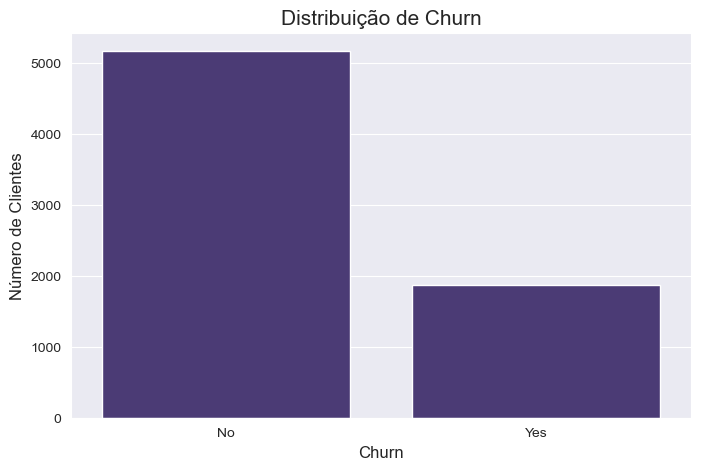

In [24]:
                                            # Analisando o Churn
churn_counts = df['Churn'].value_counts()
churn_perc = df['Churn'].value_counts(normalize=True) * 100

print("Distribuição do Churn:")
print(churn_counts)
print("\nPercentual:")
print(churn_perc)

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()

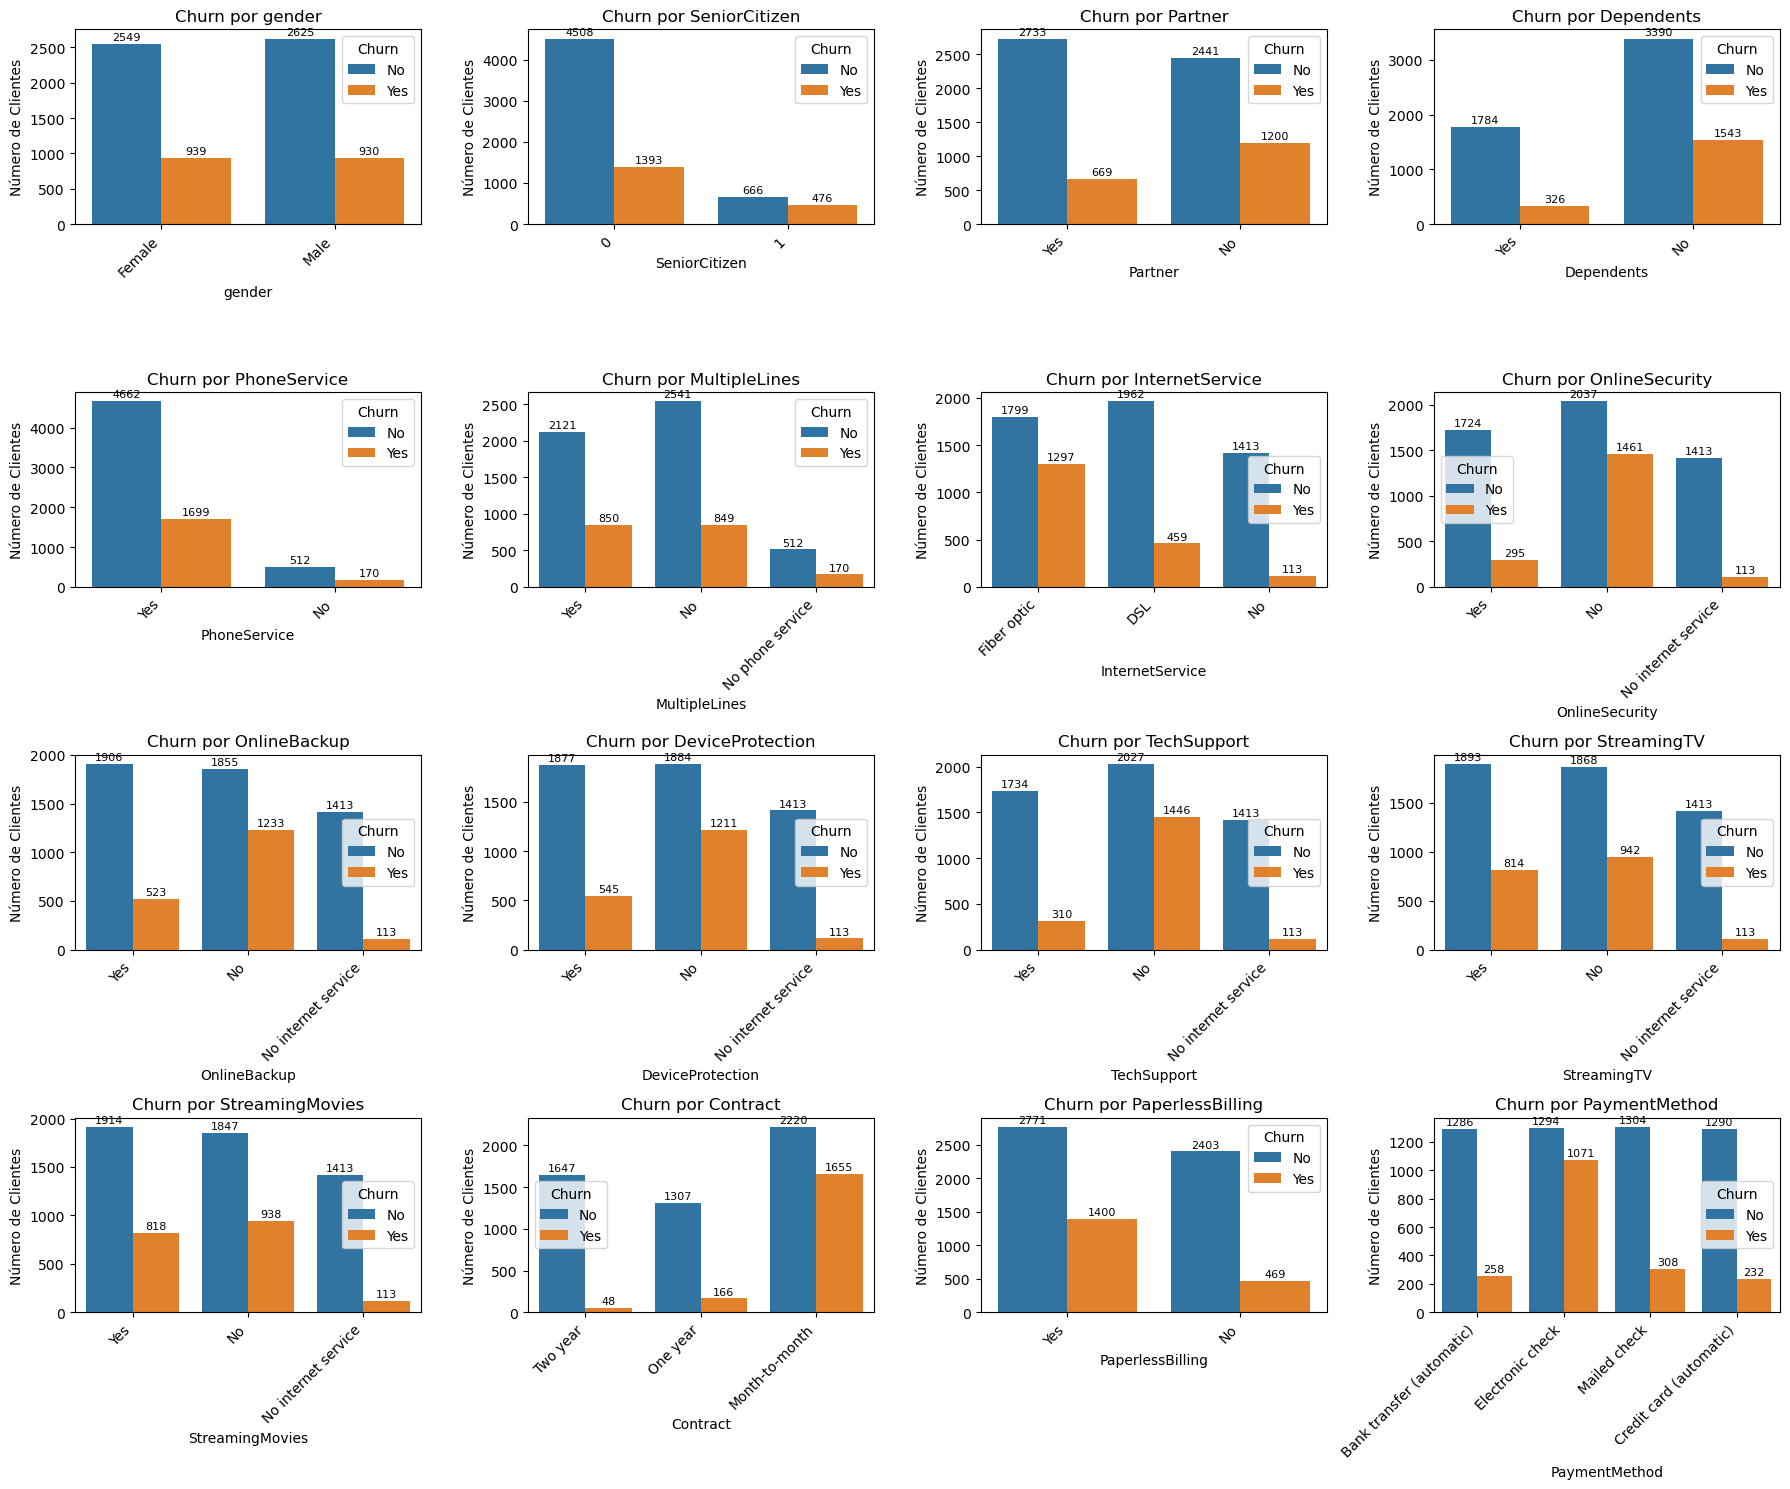

In [13]:
                                            # Analisando as variaveis categoricas
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 4, i + 1)
    
    # Calcular a taxa de churn para cada categoria
    churn_rate_by_cat = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
    
    # Criar o gráfico
    ax = sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    
    # Adicionar as taxas de churn no topo das barras 'Yes'
    for container in ax.containers:
        for p in container:
            if p.get_height() > 0:
                ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                            textcoords='offset points')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

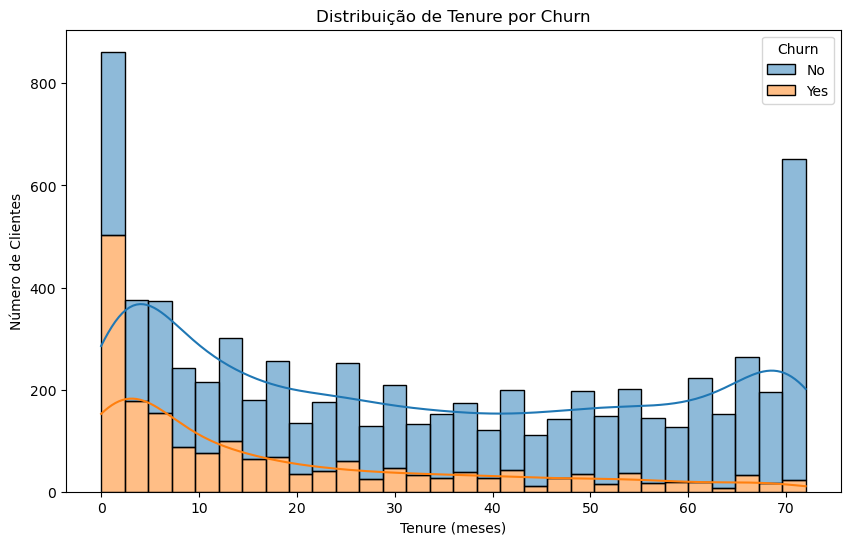


Taxa de Churn por grupo de Tenure:
tenure_group
0-12m     48.284195
12-24m    29.512894
24-48m    20.874384
48-60m    15.000000
60-72m     8.296164


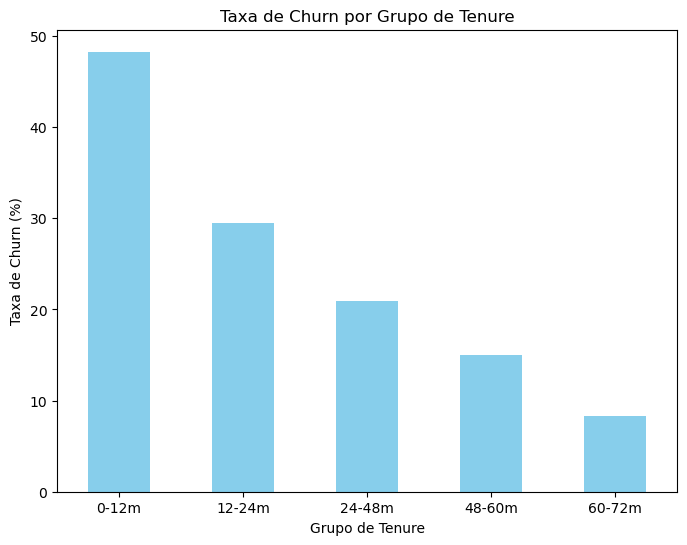

In [15]:
                                            # Distribuição de Churn por tenure
# Cria a pasta 'graficos_apresentacao' e a subpasta 'Tenure'
output_dir = 'graficos_apresentacao'
tenure_dir = os.path.join(output_dir, 'Tenure')
os.makedirs(tenure_dir, exist_ok=True)
print(f"Diretório '{tenure_dir}' criado com sucesso.")


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, kde=True)
plt.title('Distribuição de Tenure por Churn')
plt.xlabel('Tenure (meses)')
plt.ylabel('Número de Clientes')
plt.savefig(os.path.join(tenure_dir, 'distribuicao_chrun_por_tenure.png'))
plt.show()
print(f"Gráfico salvo em '{os.path.join(tenure_dir, 'distribuicao_chrun_por_tenure.png')}' com sucesso!")


# Calcular a taxa de churn para diferentes faixas de tenure
bins = [0, 12, 24, 48, 60, 72]
labels = ['0-12m', '12-24m', '24-48m', '48-60m', '60-72m']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

churn_by_tenure_group = df.groupby('tenure_group', observed=False)['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
print("\nTaxa de Churn por grupo de Tenure:")
print(churn_by_tenure_group.to_string())

plt.figure(figsize=(8, 6))
ax = churn_by_tenure_group.plot(kind='bar', color='skyblue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.title('Taxa de Churn por Grupo de Tenure', fontsize=16)
plt.xlabel('Grupo de Tenure', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 55) # Ajusta o limite do eixo Y para melhor visualização
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.savefig(os.path.join(tenure_dir, 'distribuicao_chrun_por_faixas.png'))
plt.show()
print(f"Gráfico salvo em '{os.path.join(tenure_dir, 'distribuicao_chrun_por_faixas.png')}' com sucesso!")
plt.show()

Estatísticas descritivas de MonthlyCharges:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


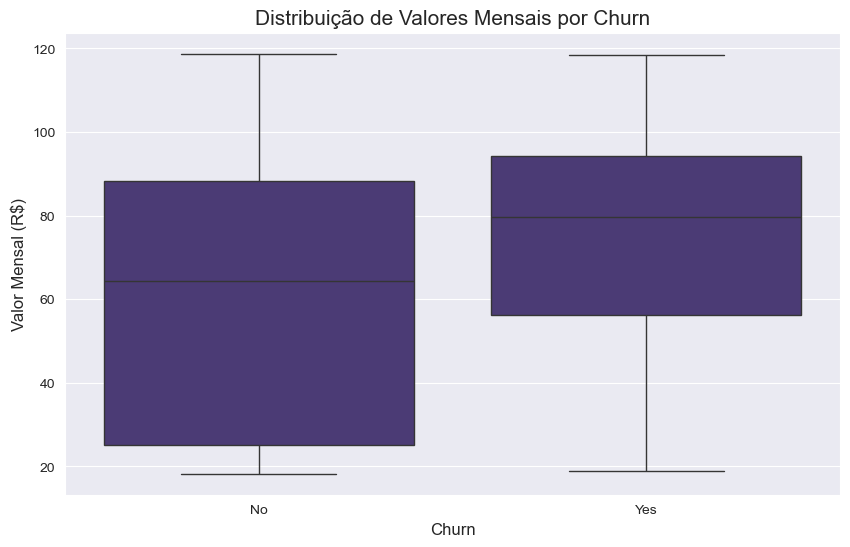


Teste T para diferença de médias: p-value = 0.0000


In [53]:
                                            # Convertendo a coluna MonthlyCharges para numérico
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace(',', '.').astype(float)

# Analisando a distribuição dos valores mensais
print("Estatísticas descritivas de MonthlyCharges:")
print(df['MonthlyCharges'].describe())

# Boxplot por Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribuição de Valores Mensais por Churn', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Valor Mensal (R$)', fontsize=12)
plt.show()

# Teste estatístico para verificar diferença nas médias
no_churn = df[df['Churn'] == 'No']['MonthlyCharges']
yes_churn = df[df['Churn'] == 'Yes']['MonthlyCharges']

t_stat, p_value = stats.ttest_ind(no_churn, yes_churn, equal_var=False)
print(f"\nTeste T para diferença de médias: p-value = {p_value:.4f}")

Dados após a limpeza: 7043 linhas e 22 colunas.
Diretório 'graficos_apresentacao\Contract' criado com sucesso.

Gerando Gráfico 1: Distribuição por Contrato...


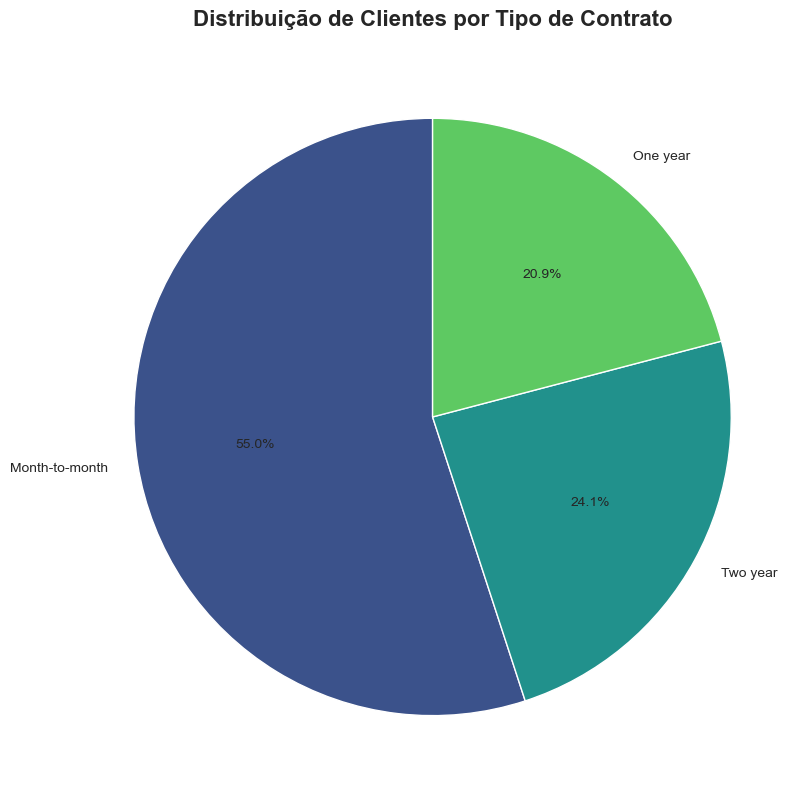

Gráfico salvo em 'graficos_apresentacao\Contract\distribuicao_por_contrato.png' com sucesso!

Gerando Gráfico 2: Taxa de Churn por Contrato...


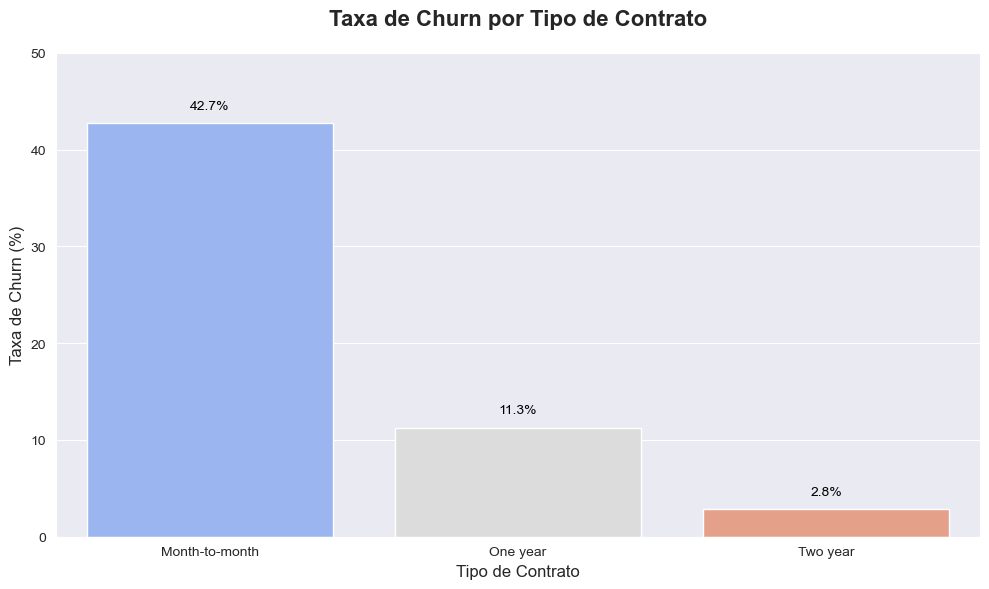

Gráfico salvo em 'graficos_apresentacao\Contract\churn_por_contrato.png' com sucesso!

Análise de 'Contract' concluída. Dois gráficos foram gerados e salvos como imagens.


In [25]:

# Configurações de estilo para os gráficos
sns.set_style("darkgrid")
sns.set_palette("viridis")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial'] # Fonte Arial padrão para evitar warnings


# Converter a variável 'Churn' para 0 e 1 para facilitar os cálculos
df['Churn_Encoded'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print(f"Dados após a limpeza: {df.shape[0]} linhas e {df.shape[1]} colunas.")

# 2. Configurar o caminho para salvar os arquivos
# Cria a pasta 'graficos_apresentacao' e a subpasta 'Contract'
output_dir = 'graficos_apresentacao'
contract_dir = os.path.join(output_dir, 'Contract')
os.makedirs(contract_dir, exist_ok=True)
print(f"Diretório '{contract_dir}' criado com sucesso.")


# 3. Gráfico 1: Distribuição de Clientes por Tipo de Contrato (Pizza)
print("\nGerando Gráfico 1: Distribuição por Contrato...")

contract_counts = df['Contract'].value_counts()
labels = contract_counts.index
sizes = contract_counts.values
colors = sns.color_palette("viridis", len(labels))

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuição de Clientes por Tipo de Contrato', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal') # Garante que o círculo seja desenhado de forma igual
plt.tight_layout()
plt.savefig(os.path.join(contract_dir, 'distribuicao_por_contrato.png'))
plt.show()
print(f"Gráfico salvo em '{os.path.join(contract_dir, 'distribuicao_por_contrato.png')}' com sucesso!")

# 4. Gráfico 2: Taxa de Churn por Tipo de Contrato (Barras)
print("\nGerando Gráfico 2: Taxa de Churn por Contrato...")

# Agrupar os dados e calcular a taxa de churn por tipo de contrato
churn_por_contrato = df.groupby('Contract')['Churn_Encoded'].mean().sort_values(ascending=False).reset_index()
churn_por_contrato['Churn Rate (%)'] = churn_por_contrato['Churn_Encoded'] * 100

plt.figure(figsize=(10, 6))
# Usando hue para resolver o Future Warning do seaborn
ax_barplot = sns.barplot(x='Contract', y='Churn Rate (%)', data=churn_por_contrato, palette='coolwarm', hue='Contract', legend=False)
plt.title('Taxa de Churn por Tipo de Contrato', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)
plt.ylim(0, 50) # Ajustar o limite para melhor visualização

# Adicionar anotações de texto no gráfico
for index, row in churn_por_contrato.iterrows():
    ax_barplot.text(row.name, row['Churn Rate (%)'] + 1.5, f"{row['Churn Rate (%)']:.1f}%", color='black', ha="center")

plt.tight_layout()
plt.savefig(os.path.join(contract_dir, 'churn_por_contrato.png'))
plt.show()
print(f"Gráfico salvo em '{os.path.join(contract_dir, 'churn_por_contrato.png')}' com sucesso!")

print("\nAnálise de 'Contract' concluída. Dois gráficos foram gerados e salvos como imagens.")


Diretório 'graficos_apresentacao\PaymentMethod' criado com sucesso.

Gerando Gráfico 1: Distribuição por Meio de Pagamento...


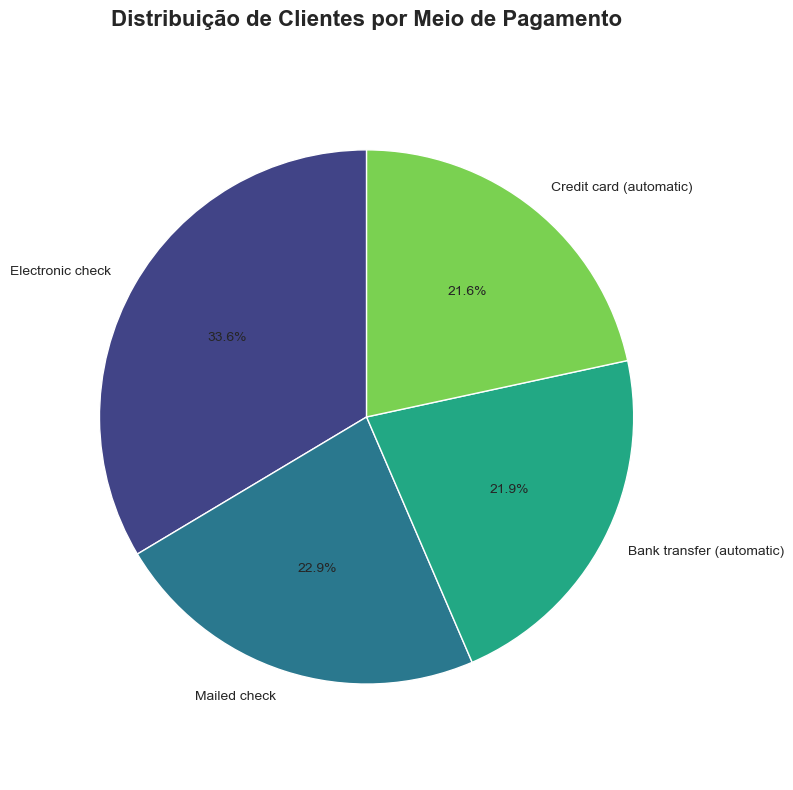

Gráfico salvo em 'graficos_apresentacao\PaymentMethod\distribuicao_por_meio_de_pagamento.png' com sucesso!

Gerando Gráfico 2: Taxa de Churn por Meio de Pagamento...


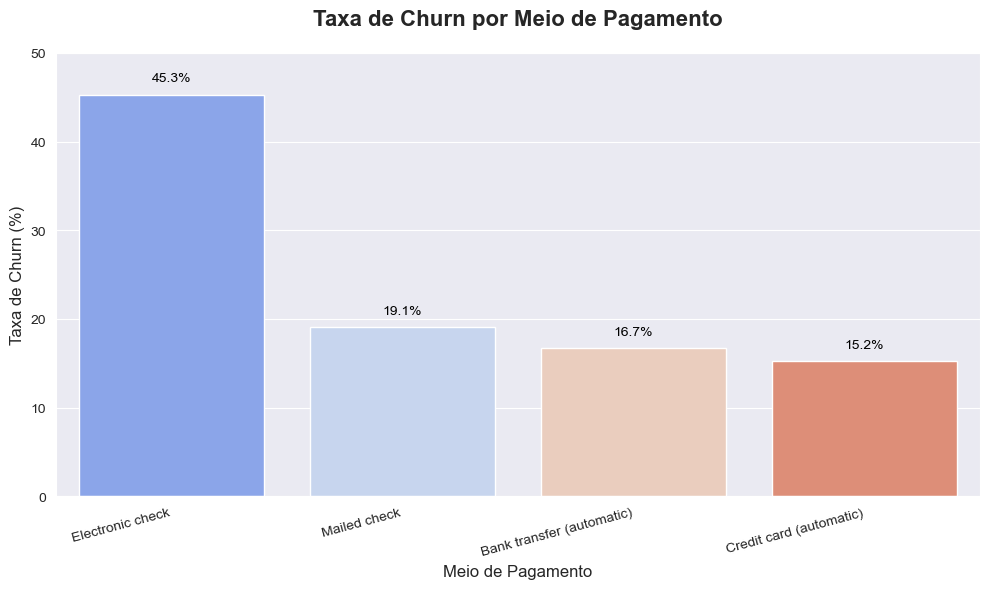

Gráfico salvo em 'graficos_apresentacao\PaymentMethod\churn_por_meio_de_pagamento.png' com sucesso!

Análise de 'PaymentMethod' concluída. Dois gráficos foram gerados e salvos como imagens.


In [26]:
                                            # PaymentMethod x Churn
# Cria a pasta 'graficos_apresentacao' e a subpasta 'PaymentMethod'
output_dir = 'graficos_apresentacao'
payment_method_dir = os.path.join(output_dir, 'PaymentMethod')
os.makedirs(payment_method_dir, exist_ok=True)
print(f"Diretório '{payment_method_dir}' criado com sucesso.")


# 3. Gráfico 1: Distribuição de Clientes por Meio de Pagamento (Pizza)
print("\nGerando Gráfico 1: Distribuição por Meio de Pagamento...")

payment_method_counts = df['PaymentMethod'].value_counts()
labels = payment_method_counts.index
sizes = payment_method_counts.values
colors = sns.color_palette("viridis", len(labels))

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuição de Clientes por Meio de Pagamento', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal') # Garante que o círculo seja desenhado de forma igual
plt.tight_layout()
plt.savefig(os.path.join(payment_method_dir, 'distribuicao_por_meio_de_pagamento.png'))
plt.show()
print(f"Gráfico salvo em '{os.path.join(payment_method_dir, 'distribuicao_por_meio_de_pagamento.png')}' com sucesso!")


# 4. Gráfico 2: Taxa de Churn por Meio de Pagamento (Barras)
print("\nGerando Gráfico 2: Taxa de Churn por Meio de Pagamento...")

# Agrupar os dados e calcular a taxa de churn por tipo de pagamento
churn_por_pagamento = df.groupby('PaymentMethod')['Churn_Encoded'].mean().sort_values(ascending=False).reset_index()
churn_por_pagamento['Churn Rate (%)'] = churn_por_pagamento['Churn_Encoded'] * 100

plt.figure(figsize=(10, 6))
# Usando hue para resolver o Future Warning do seaborn
ax_barplot = sns.barplot(x='PaymentMethod', y='Churn Rate (%)', data=churn_por_pagamento, palette='coolwarm', hue='PaymentMethod', legend=False)
plt.title('Taxa de Churn por Meio de Pagamento', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Meio de Pagamento', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)
plt.ylim(0, 50) # Ajustar o limite para melhor visualização
plt.xticks(rotation=15, ha="right") # Rotacionar os labels para melhor visualização

# Adicionar anotações de texto no gráfico
for index, row in churn_por_pagamento.iterrows():
    ax_barplot.text(row.name, row['Churn Rate (%)'] + 1.5, f"{row['Churn Rate (%)']:.1f}%", color='black', ha="center")

plt.tight_layout()
plt.savefig(os.path.join(payment_method_dir, 'churn_por_meio_de_pagamento.png'))
plt.show()
print(f"Gráfico salvo em '{os.path.join(payment_method_dir, 'churn_por_meio_de_pagamento.png')}' com sucesso!")

print("\nAnálise de 'PaymentMethod' concluída. Dois gráficos foram gerados e salvos como imagens.")

--- Gerando os gráficos de análise para as variáveis 'OnlineSecurity' e 'TechSupport' ---
Este código gera gráficos de barras para a taxa de churn para cada serviço, com um esquema de cores consistente.

Diretório 'graficos_apresentacao\OnlineSecurity' criado com sucesso.

Gerando Gráfico: Taxa de Churn por OnlineSecurity...


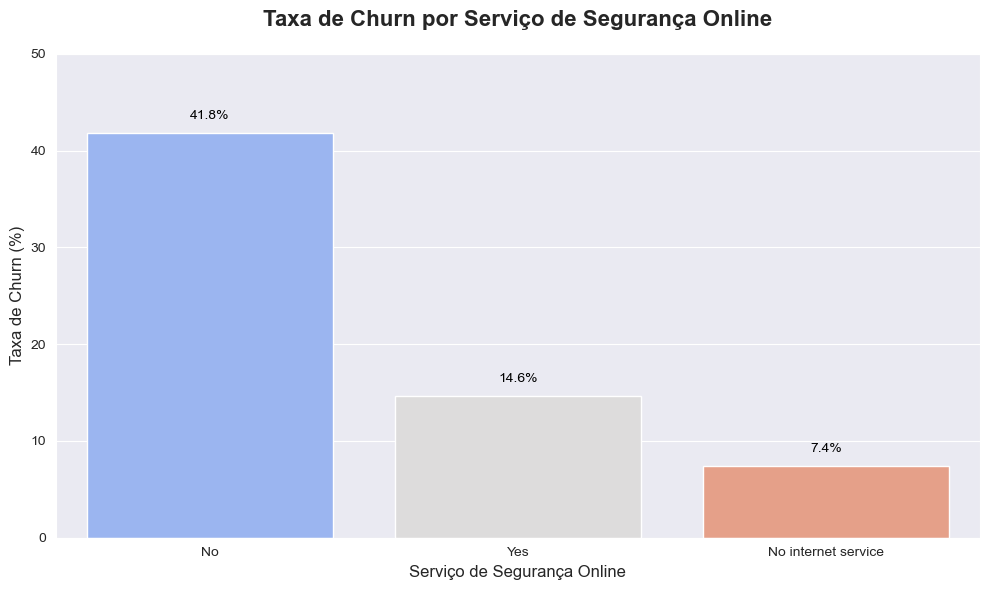

Gráfico salvo em 'graficos_apresentacao\OnlineSecurity\churn_por_seguranca.png' com sucesso!

Diretório 'graficos_apresentacao\TechSupport' criado com sucesso.

Gerando Gráfico: Taxa de Churn por Suporte Técnico...


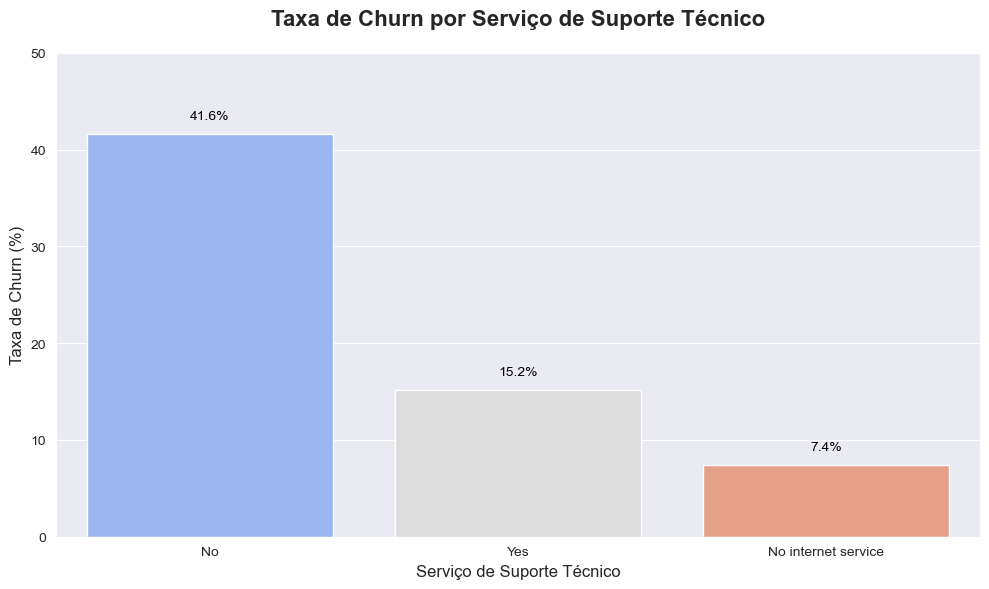

Gráfico salvo em 'graficos_apresentacao\TechSupport\churn_por_suporte.png' com sucesso!

Análise de 'OnlineSecurity' e 'TechSupport' concluída. Dois gráficos de barras foram gerados e salvos como imagens.


In [27]:
                                            # Serviços x Churn
# Configurações de estilo para os gráficos
sns.set_style("darkgrid")
sns.set_palette("viridis") # Manter o padrão, mas o 'palette' no barplot irá sobrescrever

# Introdução
print("--- Gerando os gráficos de análise para as variáveis 'OnlineSecurity' e 'TechSupport' ---")
print("Este código gera gráficos de barras para a taxa de churn para cada serviço, com um esquema de cores consistente.")

# --- Análise para o serviço 'OnlineSecurity' ---

# 2. Configurar o caminho para salvar os arquivos para OnlineSecurity
output_dir = 'graficos_apresentacao'
security_dir = os.path.join(output_dir, 'OnlineSecurity')
os.makedirs(security_dir, exist_ok=True)
print(f"\nDiretório '{security_dir}' criado com sucesso.")

# Gráfico de Barras: Taxa de Churn por OnlineSecurity
print("\nGerando Gráfico: Taxa de Churn por OnlineSecurity...")
churn_por_security = df.groupby('OnlineSecurity')['Churn_Encoded'].mean().sort_values(ascending=False).reset_index()
churn_por_security['Churn Rate (%)'] = churn_por_security['Churn_Encoded'] * 100

plt.figure(figsize=(10, 6))
# Usando hue para resolver o Future Warning do seaborn e manter a paleta
ax_security = sns.barplot(x='OnlineSecurity', y='Churn Rate (%)', data=churn_por_security, palette='coolwarm', hue='OnlineSecurity', legend=False)
plt.title('Taxa de Churn por Serviço de Segurança Online', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Serviço de Segurança Online', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)
plt.ylim(0, 50)
for index, row in churn_por_security.iterrows():
    ax_security.text(row.name, row['Churn Rate (%)'] + 1.5, f"{row['Churn Rate (%)']:.1f}%", color='black', ha="center")
plt.tight_layout()
plt.savefig(os.path.join(security_dir, 'churn_por_seguranca.png'))
plt.show()
print(f"Gráfico salvo em '{os.path.join(security_dir, 'churn_por_seguranca.png')}' com sucesso!")


# --- Análise para o serviço 'TechSupport' ---

# 3. Configurar o caminho para salvar os arquivos para TechSupport
techsupport_dir = os.path.join(output_dir, 'TechSupport')
os.makedirs(techsupport_dir, exist_ok=True)
print(f"\nDiretório '{techsupport_dir}' criado com sucesso.")

# Gráfico de Barras: Taxa de Churn por TechSupport
print("\nGerando Gráfico: Taxa de Churn por Suporte Técnico...")
churn_por_techsupport = df.groupby('TechSupport')['Churn_Encoded'].mean().sort_values(ascending=False).reset_index()
churn_por_techsupport['Churn Rate (%)'] = churn_por_techsupport['Churn_Encoded'] * 100

plt.figure(figsize=(10, 6))
# Usando hue para resolver o Future Warning do seaborn e manter a paleta
ax_techsupport = sns.barplot(x='TechSupport', y='Churn Rate (%)', data=churn_por_techsupport, palette='coolwarm', hue='TechSupport', legend=False)
plt.title('Taxa de Churn por Serviço de Suporte Técnico', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Serviço de Suporte Técnico', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)
plt.ylim(0, 50)
for index, row in churn_por_techsupport.iterrows():
    ax_techsupport.text(row.name, row['Churn Rate (%)'] + 1.5, f"{row['Churn Rate (%)']:.1f}%", color='black', ha="center")
plt.tight_layout()
plt.savefig(os.path.join(techsupport_dir, 'churn_por_suporte.png'))
plt.show()
print(f"Gráfico salvo em '{os.path.join(techsupport_dir, 'churn_por_suporte.png')}' com sucesso!")

print("\nAnálise de 'OnlineSecurity' e 'TechSupport' concluída. Dois gráficos de barras foram gerados e salvos como imagens.")


In [54]:
                                            # Retorno Financeiro - estimativa

df['TotalCharges'] = df['TotalCharges'].str.replace(',', '.').astype(float)
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df = df.dropna(subset=['TotalCharges'])

# Introdução
print("--- Calculando a média dos gastos mensais para clientes Churn e Não-Churn ---")

# Verificação opcional dos tipos de dados para confirmar
print("\nVerificando os tipos de dados atuais:")
print(df[['MonthlyCharges', 'TotalCharges']].info())

# 2. Calcular a Média de Valor Mensal para cada grupo
# Clientes que deram Churn
media_churn = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()

# Clientes que NÃO deram Churn
media_nao_churn = df[df['Churn'] == 'No']['MonthlyCharges'].mean()

# 3. Exibir os resultados
print("\nResultados:")
print(f"Média de Valor Mensal dos Clientes que deram CHURN: R$ {media_churn:.2f}")
print(f"Média de Valor Mensal dos Clientes que NÃO deram CHURN: R$ {media_nao_churn:.2f}")

--- Calculando a média dos gastos mensais para clientes Churn e Não-Churn ---

Verificando os tipos de dados atuais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  7043 non-null   float64
 1   TotalCharges    7043 non-null   float64
dtypes: float64(2)
memory usage: 110.2 KB
None

Resultados:
Média de Valor Mensal dos Clientes que deram CHURN: R$ 74.44
Média de Valor Mensal dos Clientes que NÃO deram CHURN: R$ 61.27



Diretório 'graficos_apresentacao\Retorno Financeiro' criado com sucesso.
Valor total perdido com churn: R$2,862,926.90

Estimativas de valor que pode ser salvo com 25% de redução no churn:
- Baseado em 12 meses: R$417,169.23
- Baseado no tenure médio (37.6 meses): R$1,306,086.11


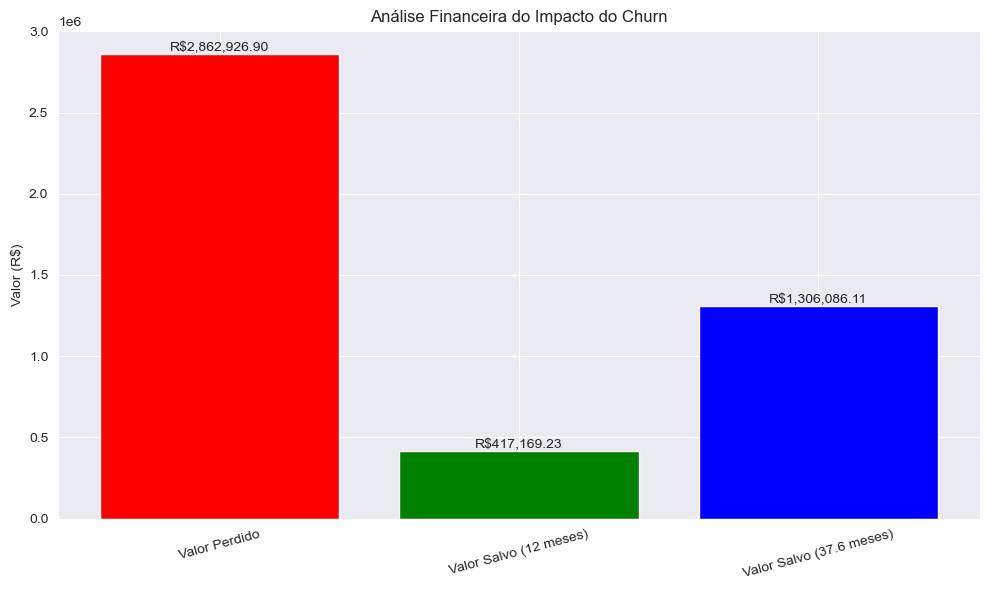

Gráfico salvo em 'graficos_apresentacao\TechSupport\retorno_financeiro_salvo.png' com sucesso!


In [59]:
                                            # Retorno Financeiro - estimativa
output_dir = 'graficos_apresentacao'
retorno_financeiro = os.path.join(output_dir, 'Retorno Financeiro')
os.makedirs(retorno_financeiro, exist_ok=True)
print(f"\nDiretório '{retorno_financeiro}' criado com sucesso.")
# Criando Kpi 'valor_perdido'
valor_perdido = df[df['Churn'] == 'Yes']['TotalCharges'].sum()

if 'MonthlyCharges' in df.columns:
    # 25% redução no churn
    total_churn = (df['Churn'] == 'Yes').sum()
    reducao_clientes = int(total_churn * 0.25)
    
    # Valor médio dos clientes que deram churn
    media_mensal_churn = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
    
    # Estimando valor anual salvo
    valor_salvo_anual = reducao_clientes * media_mensal_churn * 12
    
    # Usando tempo médio clientes que permaneceram
    tenure_medio = df[df['Churn'] == 'No']['tenure'].mean()
    valor_salvo_tenure = reducao_clientes * media_mensal_churn * tenure_medio

# Resultados
print(f"Valor total perdido com churn: R${valor_perdido:,.2f}\n")

print("Estimativas de valor que pode ser salvo com 25% de redução no churn:")
if 'MonthlyCharges' in df.columns:
    print(f"- Baseado em 12 meses: R${valor_salvo_anual:,.2f}")
    print(f"- Baseado no tenure médio ({tenure_medio:.1f} meses): R${valor_salvo_tenure:,.2f}")
else:
    print(f"- Estimativa conservadora: R${valor_salvo_anual:,.2f}")

# Visualização
plt.figure(figsize=(10, 6))
if 'MonthlyCharges' in df.columns:
    valores = [valor_perdido, valor_salvo_anual, valor_salvo_tenure]
    labels = ['Valor Perdido', 'Valor Salvo (12 meses)', f'Valor Salvo ({tenure_medio:.1f} meses)']
else:
    valores = [valor_perdido, valor_salvo_anual]
    labels = ['Valor Perdido', 'Valor Salvo Estimado']

bars = plt.bar(labels, valores, color=['red', 'green', 'blue'][:len(valores)])
plt.title('Análise Financeira do Impacto do Churn')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
              f'R${height:,.2f}',
              ha='center', va='bottom')

plt.tight_layout()
plt.savefig(os.path.join(techsupport_dir, 'retorno_financeiro_salvo.png'))
plt.show()
print(f"Gráfico salvo em '{os.path.join(techsupport_dir, 'retorno_financeiro_salvo.png')}' com sucesso!")